In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report 
from sklearn import preprocessing

In [2]:
iris =pd.read_csv("Iris.csv")

In [3]:
iris.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


In [4]:
iris["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
# here the species is the y variable we need to convert it into numerical

In [6]:
label_encoder = preprocessing.LabelEncoder()
iris["Species "] =label_encoder.fit_transform(iris["Species"])

# here we use labelled encoder not get dummies method because our target column should split into only one column and get dummies method 
# get dummies method give us the more than one column

In [7]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,2
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


In [8]:
iris["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# split the data into x and y 

In [9]:
iris.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0


In [10]:
x = iris.iloc[:,1:5]
y = iris.iloc[:,-1]

In [11]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species , Length: 150, dtype: int32

In [13]:
colnames =list(iris.columns)
colnames

['Unnamed: 0',
 'Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Species',
 'Species ']

# split the entire data into train and test

In [14]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state =0)
# test_size = test size is 20% data we keep it as a test
# random_state = it select the the datapoint  in random order keep is as a zero unless the accuracy of model changes frequantly

In [15]:
x_train.shape

(120, 4)

In [16]:
y_test.shape

(30,)

In [17]:
x_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [18]:
y_test

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
Name: Species , dtype: int32

# building the desicion tree model

In [19]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth =2,random_state =0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]')]

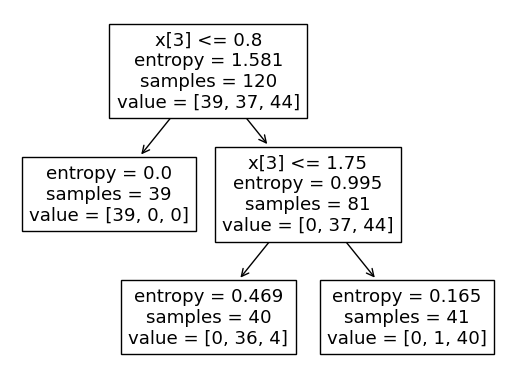

In [20]:
tree.plot_tree(model)


In [21]:
iris.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species', 'Species '],
      dtype='object')

In [22]:
x.iloc[:,3]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: Petal.Width, Length: 150, dtype: float64

[Text(0.4, 0.8333333333333334, 'petal width <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]\nclass = virginica')]

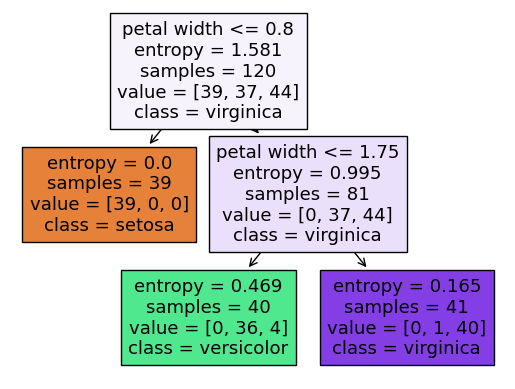

In [23]:
fn =["sepal length",'sepal width','petal length','petal width']
cn =['setosa','versicolor','virginica']
tree.plot_tree(model,feature_names =fn,
              class_names =cn,
              filled =True)

In [24]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    14
0    11
2     5
Name: count, dtype: int64

In [25]:
x1 = pd.DataFrame(preds)

In [26]:
y_test.value_counts()

Species 
1    13
0    11
2     6
Name: count, dtype: int64

In [27]:
x1.value_counts()

0
1    14
0    11
2     5
Name: count, dtype: int64

In [30]:
model.feature_importances_

array([0., 0., 0., 1.])

In [32]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,11,0,0
1,0,13,0
2,0,1,5


In [36]:
#to check the accuracy
np.mean(preds == y_test)

0.9666666666666667

# buidling tree using the ginni

In [39]:
# gini used for the both classification and regression
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth =3,random_state =0)

In [42]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:
pred= model_gini.predict(x_test)

In [44]:
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

In [45]:
np.mean( pred ==y_test)

0.9666666666666667

# he we use the decision treee for regression

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,2
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


In [49]:
# here we take the new y variable for the regression
# y value is continuous numeric for the regressiom

In [64]:
array =iris.values
x =array[:,1:4]
y =array[:,4]


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state =1)


In [66]:
x_train.shape

(100, 3)

In [67]:
x_test.shape

(50, 3)

In [69]:
model = DecisionTreeRegressor(random_state =1)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [72]:
model.score(x_test,y_test) # this will calculate the accuracy of the model

0.8551746908392364

In [76]:
predictis =model.predict(x_test)

In [80]:
predictis

array([0.4, 1. , 1.4, 0.1, 2.2, 1.4, 1.5, 0.2, 0.2, 2.3, 1.3, 0.2, 1.6,
       1.5, 1.5, 0.2, 1. , 1.2, 0.2, 0.2, 1.3, 1.2, 1.5, 0.2, 2.5, 1.3,
       0.1, 0.4, 1.4, 1.5, 1.5, 2.1, 1.3, 2.2, 1.9, 0.2, 1.1, 0.2, 1.5,
       1.4, 2.1, 0.2, 1.6, 2.2, 1.5, 1.4, 0.2, 0.2, 0.1, 1.3])

In [81]:
y_test

array([0.4, 1. , 1.4, 0.1, 2.2, 1.4, 1.5, 0.2, 0.2, 2.3, 1.3, 0.2, 1.6,
       1.5, 1.5, 0.2, 1. , 1.2, 0.2, 0.2, 1.3, 1.2, 1.5, 0.2, 2.5, 1.3,
       0.1, 0.4, 1.4, 1.5, 1.5, 2.1, 1.3, 2.2, 1.9, 0.2, 1.1, 0.2, 1.5,
       1.4, 2.1, 0.2, 1.6, 2.2, 1.5, 1.4, 0.2, 0.2, 0.1, 1.3])

In [82]:
pd.crosstab(predictis,y_test)

col_0,0.1,0.2,0.2,0.4,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.9,2.1,2.2,2.3,2.5
row_0,,,,,,,,,,,,,,,,
0.1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.2,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1.2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0
1.4,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0
